In [2]:
%pip install wbdata
%pip install pandas-datareader

import numpy as np
import pandas as pd
import wbdata
from pandas_datareader import wb
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

  Using cached wbdata-1.1.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached dateparser-1.3.0-py3-none-any.whl.metadata (30 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached tzlocal-5.3.1-py3-none-any.whl.metadata (7.6 kB)
Using cached wbdata-1.1.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
Using cached dateparser-1.3.0-py3-none-any.whl (318 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached tzlocal-5.3.1-py3-none-any.whl (18 kB)
  Attempting uninstall: cachetools
    Found existing installation: cachetools 6.2.1
    Uninstalling cachetools-6.2.1:
      Successfully uninstalled cach

Key '-5205095825218511830' not in persistent cache.
Key '9097528278055997621' not in persistent cache.
Key '936141101416102449' not in persistent cache.
Key '8145501871917756544' not in persistent cache.
Key '6944891132385092073' not in persistent cache.
Key '-2533707776157486969' not in persistent cache.
Key '277295611359798998' not in persistent cache.
Key '6097209666898232665' not in persistent cache.
Key '-4450450098411127467' not in persistent cache.
Key '-1828107490173108019' not in persistent cache.
Key '5997012583721708348' not in persistent cache.
Key '-4615078535075420731' not in persistent cache.
Key '3284005773324770753' not in persistent cache.
Key '-6170826127592878441' not in persistent cache.
Key '4308844627910947091' not in persistent cache.
Key '-2651756613044994172' not in persistent cache.
Key '3168157442493439495' not in persistent cache.
Key '-7379502322815920637' not in persistent cache.
Key '-4114670220817362331' not in persistent cache.
Key '-386043280826803636

In [3]:
age_ranges = []

for i in np.arange(0, 80, 5):
    age_ranges.append({'code': f"{i:02d}{i + 4:02d}", 
                       'label': f"{i} - {i + 4}"
                      })
    
age_ranges.append({'code': '80UP', 
                   'label': '80+'})
print(age_ranges)

[{'code': '0004', 'label': '0 - 4'}, {'code': '0509', 'label': '5 - 9'}, {'code': '1014', 'label': '10 - 14'}, {'code': '1519', 'label': '15 - 19'}, {'code': '2024', 'label': '20 - 24'}, {'code': '2529', 'label': '25 - 29'}, {'code': '3034', 'label': '30 - 34'}, {'code': '3539', 'label': '35 - 39'}, {'code': '4044', 'label': '40 - 44'}, {'code': '4549', 'label': '45 - 49'}, {'code': '5054', 'label': '50 - 54'}, {'code': '5559', 'label': '55 - 59'}, {'code': '6064', 'label': '60 - 64'}, {'code': '6569', 'label': '65 - 69'}, {'code': '7074', 'label': '70 - 74'}, {'code': '7579', 'label': '75 - 79'}, {'code': '80UP', 'label': '80+'}]


In [4]:
male_variables = {f"SP.POP.{b['code']}.MA": f"Males {b['label']}" for b in age_ranges}
female_variables = {f"SP.POP.{b['code']}.FE": f"Females {b['label']}" for b in age_ranges}

variables = {}

variables.update(male_variables)
variables.update(female_variables)

print(variables)

{'SP.POP.0004.MA': 'Males 0 - 4', 'SP.POP.0509.MA': 'Males 5 - 9', 'SP.POP.1014.MA': 'Males 10 - 14', 'SP.POP.1519.MA': 'Males 15 - 19', 'SP.POP.2024.MA': 'Males 20 - 24', 'SP.POP.2529.MA': 'Males 25 - 29', 'SP.POP.3034.MA': 'Males 30 - 34', 'SP.POP.3539.MA': 'Males 35 - 39', 'SP.POP.4044.MA': 'Males 40 - 44', 'SP.POP.4549.MA': 'Males 45 - 49', 'SP.POP.5054.MA': 'Males 50 - 54', 'SP.POP.5559.MA': 'Males 55 - 59', 'SP.POP.6064.MA': 'Males 60 - 64', 'SP.POP.6569.MA': 'Males 65 - 69', 'SP.POP.7074.MA': 'Males 70 - 74', 'SP.POP.7579.MA': 'Males 75 - 79', 'SP.POP.80UP.MA': 'Males 80+', 'SP.POP.0004.FE': 'Females 0 - 4', 'SP.POP.0509.FE': 'Females 5 - 9', 'SP.POP.1014.FE': 'Females 10 - 14', 'SP.POP.1519.FE': 'Females 15 - 19', 'SP.POP.2024.FE': 'Females 20 - 24', 'SP.POP.2529.FE': 'Females 25 - 29', 'SP.POP.3034.FE': 'Females 30 - 34', 'SP.POP.3539.FE': 'Females 35 - 39', 'SP.POP.4044.FE': 'Females 40 - 44', 'SP.POP.4549.FE': 'Females 45 - 49', 'SP.POP.5054.FE': 'Females 50 - 54', 'SP.POP.5

In [5]:
def population_df(countries, start, end):
    
    df = wb.download(indicator = variables, 
                     country = countries, 
                     start = start, 
                     end = end)
    
    df = df.rename(columns = variables)
    
    df = df.sort_index()
    
    return df

pop = population_df(['USA'], start = 2000, end = 2020)
pop.head()

/tmp/ipykernel_81/1996821281.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator = variables,


Males 0 - 4  Males 5 - 9  Males 10 - 14  Males 15 - 19  \
country       year                                                           
United States 2000      9771939     10335718       10553412       10509013   
              2001      9843473     10185442       10741746       10606063   
              2002      9926071     10047860       10862596       10667781   
              2003     10004990      9952683       10902135       10752048   
              2004     10087732      9925601       10861255       10887805   

                    Males 20 - 24  Males 25 - 29  Males 30 - 34  \
country       year                                                
United States 2000       10113115       10099438       10681709   
              2001       10381773        9934971       10716510   
              2002       10593144        9908339       10684970   
              2003       10753678       10017439       10581542   
              2004       10873838       10188229       10448447   

                    Males 35 - 39  Males 40 - 44  Males 45 - 49  ...  \
country       year                                               ...   
United States 2000       11685873       11434350       10101752  ...   
              2001       11490531       11612386       10376690  ...   
              2002       11243072       11725204       10645567  ...   
              2003       10995463       11746971       10889716  ...   
              2004       10800389       11722118       11098720  ...   

                    Females 35 - 39  Females 40 - 44  Females 45 - 49  \
country       year                                                      
United States 2000         11230889         11275581         10162194   
              2001         11025682         11372211         10453769   
              2002         10780925         11433366         10722137   
              2003         10534846         11423398         10945036   
              2004         10337589         11384371         11127657   

                    Females 50 - 54  Females 55 - 59  Females 60 - 64  \
country       year                                                      
United States 2000          8950669          6977396          5596457   
              2001          9240314          7291983          5740996   
              2002          9399388          7710777          5984973   
              2003          9572435          8080769          6285001   
              2004          9818989          8439182          6561036   

                    Females 65 - 69  Females 70 - 74  Females 75 - 79  \
country       year                                                      
United States 2000          5030856          4783926          4247941   
              2001          5030189          4740535          4249963   
              2002          5054830          4695425          4231361   
              2003          5120835          4638729          4208188   
              2004          5215139          4609271          4179263   

                    Females 80+  
country       year               
United States 2000      6030376  
              2001      6131239  
              2002      6240916  
              2003      6339001  
              2004      6446416  

[5 rows x 34 columns]

In [6]:
def _age_sort_key(label):
    s = str(label)
    num = ''
    for character in s:
        if character.isdigit():
            num += character
        elif num:
            break
    return int(num) if num else 9999

def population_pyramid(df, country = None, year = None, title = None, ax = None):
    if country is not None and year is not None:
        row = df.loc[(country, str(year))]
    else:
        row = df.iloc[0]

    male_cols = [c for c in row.index if str(c).startswith('Males ')]
    female_cols = [c for c in row.index if str(c).startswith('Females ')]

    if len(male_cols) == 0 or len(female_cols) == 0:
        return ValueError('No columns starting with Males and Females')

    def age_label(column_name, prefix):
        return str(column_name)[len(prefix):]

    male_map = {age_label(c, 'Males '): c for c in male_cols}
    female_map = {age_label(c, 'Females '): c for c in female_cols}

    ages = sorted(set(male_map.keys()) & set(female_map.keys()), key = _age_sort_key)

    males = np.array([row[male_map[a]] if a in male_map else np.nan for a in ages], dtype=float)
    females = np.array([row[female_map[a]] if a in female_map else np.nan for a in ages], dtype=float)

    scale = 1e6
    males = males/scale
    females = females/scale

    males_plot = -males
    females_plot = females

    if ax is None:
        fig, ax = plt.subplots(figsize = (7, 6))

    y = np.arange(len(ages))
    ax.barh(y, males_plot, label = "Males")
    ax.barh(y, females_plot, label = "Females")

    ax.set_yticks(y)
    ax.set_yticklabels(ages)

    max_val = max(np.nanmax(males_plot), np.nanmax(females_plot)) if len(ages) else 1
    ax.set_xlim(-max_val * 1.1, max_val * 1.1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{abs(int(x))}"))

    ax.axvline(0, linewidth=1)

    ax.set_xlabel("Population (millions)")
    ax.set_ylabel("Age group")

    if title is None:
        if country is not None:
            title = f"{country} Population Pyramid"
        else:
            title = "Population Pyramid"
    ax.set_title(title)

    ax.legend()
    return ax

<Axes: title={'center': 'United States Population Pyramid'}, xlabel='Population (millions)', ylabel='Age group'>

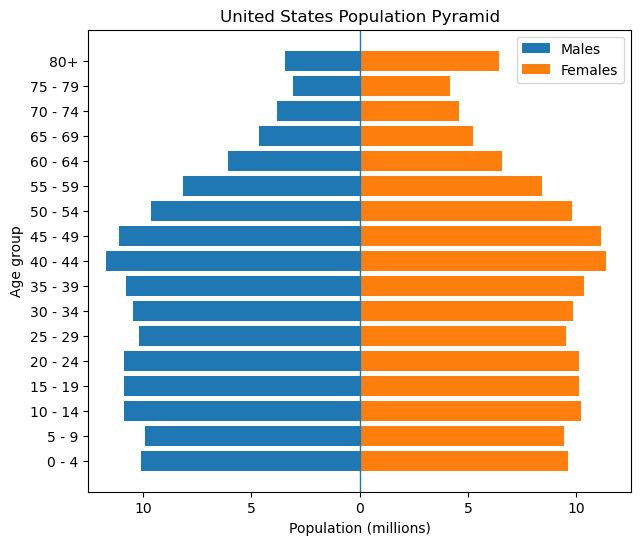

In [7]:
population_pyramid(pop, country = 'United States', year = 2004)

In [8]:
def animated_population_pyramid(df, country, years = None, interval = 400, title = None):

    fig, ax = plt.subplots(figsize=(7, 6))

    available_years = list(df.loc[country].index)
    if years is None:
        years = available_years
    else:
        years = [str(y) for y in years]
        years = [y for y in years if y in available_years]

    if len(years) == 0:
        raise ValueError("No matching years found for that country in the dataframe.")

    male_cols = [c for c in df.columns if str(c).startswith("Males ")]
    female_cols = [c for c in df.columns if str(c).startswith("Females ")]
    scale = 1e6  # millions (matches your pyramid)
    max_val = (df.loc[country, male_cols + female_cols].max().max()) / scale
    xlim = (-max_val * 1.1, max_val * 1.1)

    def update(frame_year):
        ax.clear()

        population_pyramid(
            df,
            country=country,
            year=frame_year,
            title=(title if title is not None else f"{country} Population Pyramid ({frame_year})"),
            ax=ax
        )

        ax.set_xlim(*xlim)
        return ax

    anim = animation.FuncAnimation(
        fig,
        update,
        frames=years,
        interval=interval,
        blit=False,
        repeat=True
    )

    plt.close(fig)
    return HTML(anim.to_jshtml())

In [9]:
animated_population_pyramid(pop, country="United States", interval=500)

In [10]:
def plot_wdi_indicator(countries, indicator_code, start=1960, end=2023,
                       title=None, ylabel=None):

    df = wb.download(
        indicator=indicator_code,
        country=countries,
        start=start,
        end=end
    ).reset_index()

    df["year"] = df["year"].astype(int)
    df = df.sort_values("year")

    if title is None:
        title = f"{indicator_code} Over Time"
    if ylabel is None:
        ylabel = indicator_code

    fig, ax = plt.subplots(figsize=(8,5))

    for name, country_data in df.groupby("country"):
        ax.plot(country_data["year"],
                country_data[indicator_code],
                label=name)

    ax.set_xlabel("Year")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(alpha=0.3)

    return df

In [11]:
def plot_aging(countries, start=1960, end=2023):
    return plot_wdi_indicator(
        countries=countries,
        indicator_code="SP.POP.65UP.TO.ZS",
        start=start,
        end=end,
        title="Population Ages 65+ (% of Total)",
        ylabel="Percent of Population"
    )

/tmp/ipykernel_81/649397192.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


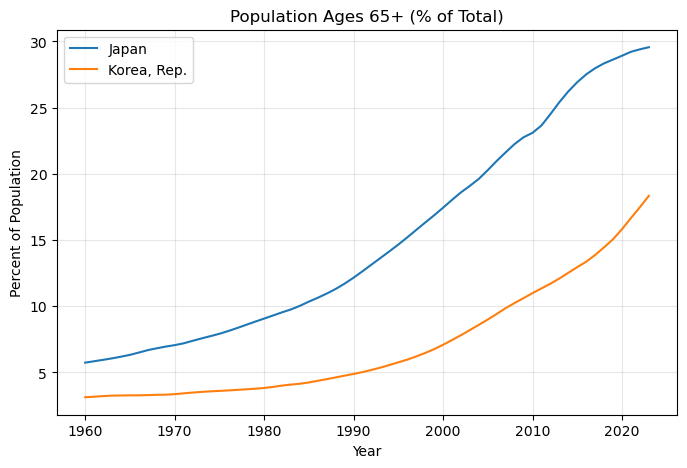

In [12]:
plot_aging(["JPN", "KOR"], start=1960, end=2023)
plt.show()

In [13]:
def plot_female_labor(countries, start=1960, end=2023):
    return plot_wdi_indicator(
        countries=countries,
        indicator_code="SL.TLF.CACT.FE.ZS",
        start=start,
        end=end,
        title="Female Labor Force Participation (%)",
        ylabel="Percent of Female Population 15+"
    )

/tmp/ipykernel_81/649397192.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


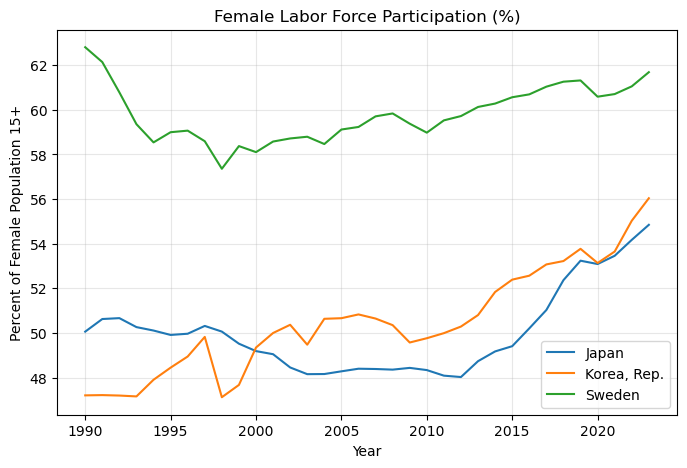

In [20]:
plot_female_labor(["JPN", "KOR", "SWE"], start=1960, end=2023)
plt.show()

In [15]:
def plot_fertility(countries, start=1960, end=2023):
    return plot_wdi_indicator(
        countries=countries,
        indicator_code="SP.DYN.TFRT.IN",
        start=start,
        end=end,
        title="Total Fertility Rate (births per woman)",
        ylabel="Births per woman"
    )

/tmp/ipykernel_81/649397192.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


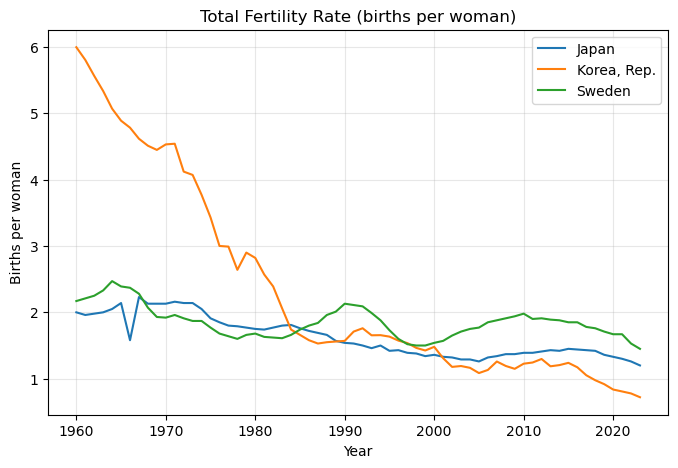

In [21]:
plot_fertility(["JPN", "KOR", "SWE"], start=1960, end=2023)
plt.show()

In [17]:
def plot_net_migration(countries, start=1960, end=2023):
    return plot_wdi_indicator(
        countries=countries,
        indicator_code="SM.POP.NETM",
        start=start,
        end=end,
        title="Net Migration (net number of migrants)",
        ylabel="Net migrants"
    )

/tmp/ipykernel_81/649397192.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


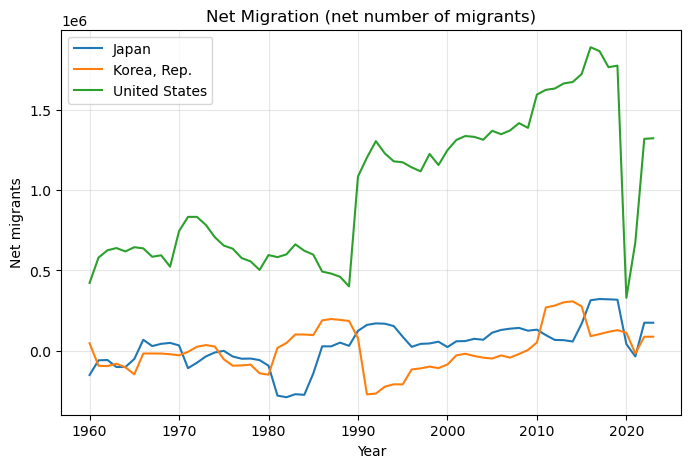

In [24]:
plot_net_migration(["JPN", "KOR", "USA"], start=1960, end=2023)
plt.show()

In [26]:
def plot_urbanization(countries, start=1960, end=2023):
    return plot_wdi_indicator(
        countries=countries,
        indicator_code="SP.URB.TOTL.IN.ZS",
        start=start,
        end=end,
        title="Urban Population (% of Total)",
        ylabel="Percent Urban"
    )

/tmp/ipykernel_81/649397192.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


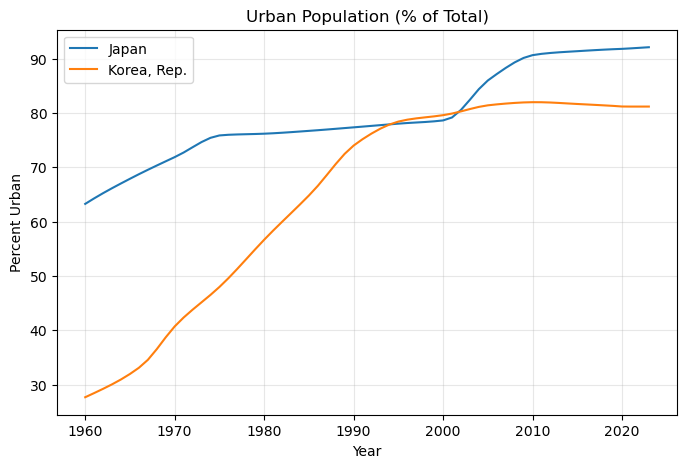

In [27]:
plot_urbanization(["JPN", "KOR"], 1960, 2023)
plt.show()